In [11]:
import pandas as pd
import os
import seaborn as sn
import plotly.graph_objects as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_list=[]
for i in os.listdir(r'./etf/Instruments'):
    for j in os.listdir(r'./etf/Instruments/'+i):
        size = len(j)
        name = j[:size - 4]
        globals()[name] = pd.read_csv(r'./etf/Instruments/'+i+'/'+j)
        globals()[name].dfname = name
        df_list.append(globals()[name])

In [4]:
for i in df_list:
    i['Datetime'] = i['Date'] + ' ' + i['Time']
    i.drop('Date', inplace = True, axis = 1)
    i.drop('Time', inplace = True, axis = 1)
    i.set_index('Datetime', inplace = True)
    print(i.dfname)
    print(i.describe())
    print('\n')

60_min
               Open          High           Low         Close           Vol  \
count  24006.000000  24006.000000  24006.000000  24006.000000  2.400600e+04   
mean      52.382089     52.451007     52.302973     52.375709  4.145420e+03   
std       14.995689     15.012361     14.980149     14.999592  2.413554e+04   
min       19.890000     20.020000     19.740000     20.000000  0.000000e+00   
25%       43.010000     43.070000     42.942500     43.010000  4.000000e+02   
50%       47.790000     47.830000     47.730000     47.780000  1.230000e+03   
75%       60.930000     60.990000     60.880000     60.930000  3.500000e+03   
max      102.500000    102.500000    102.210000    102.430000  2.908790e+06   

                  OI           ADX     TrigLevel           Avg        AvgExp  \
count   24006.000000  24006.000000  24006.000000  24006.000000  24006.000000   
mean     4051.868283     28.029623     18.988128     52.135032     52.440724   
std     15906.905864     10.501571      0

60_min


Daily


AOR_60_min


AOR_daily


EPP_60_daily


EPP_60_min


EWG_60_min


EWG_daily




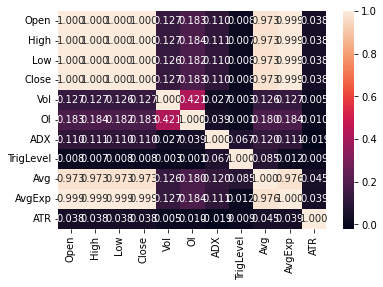

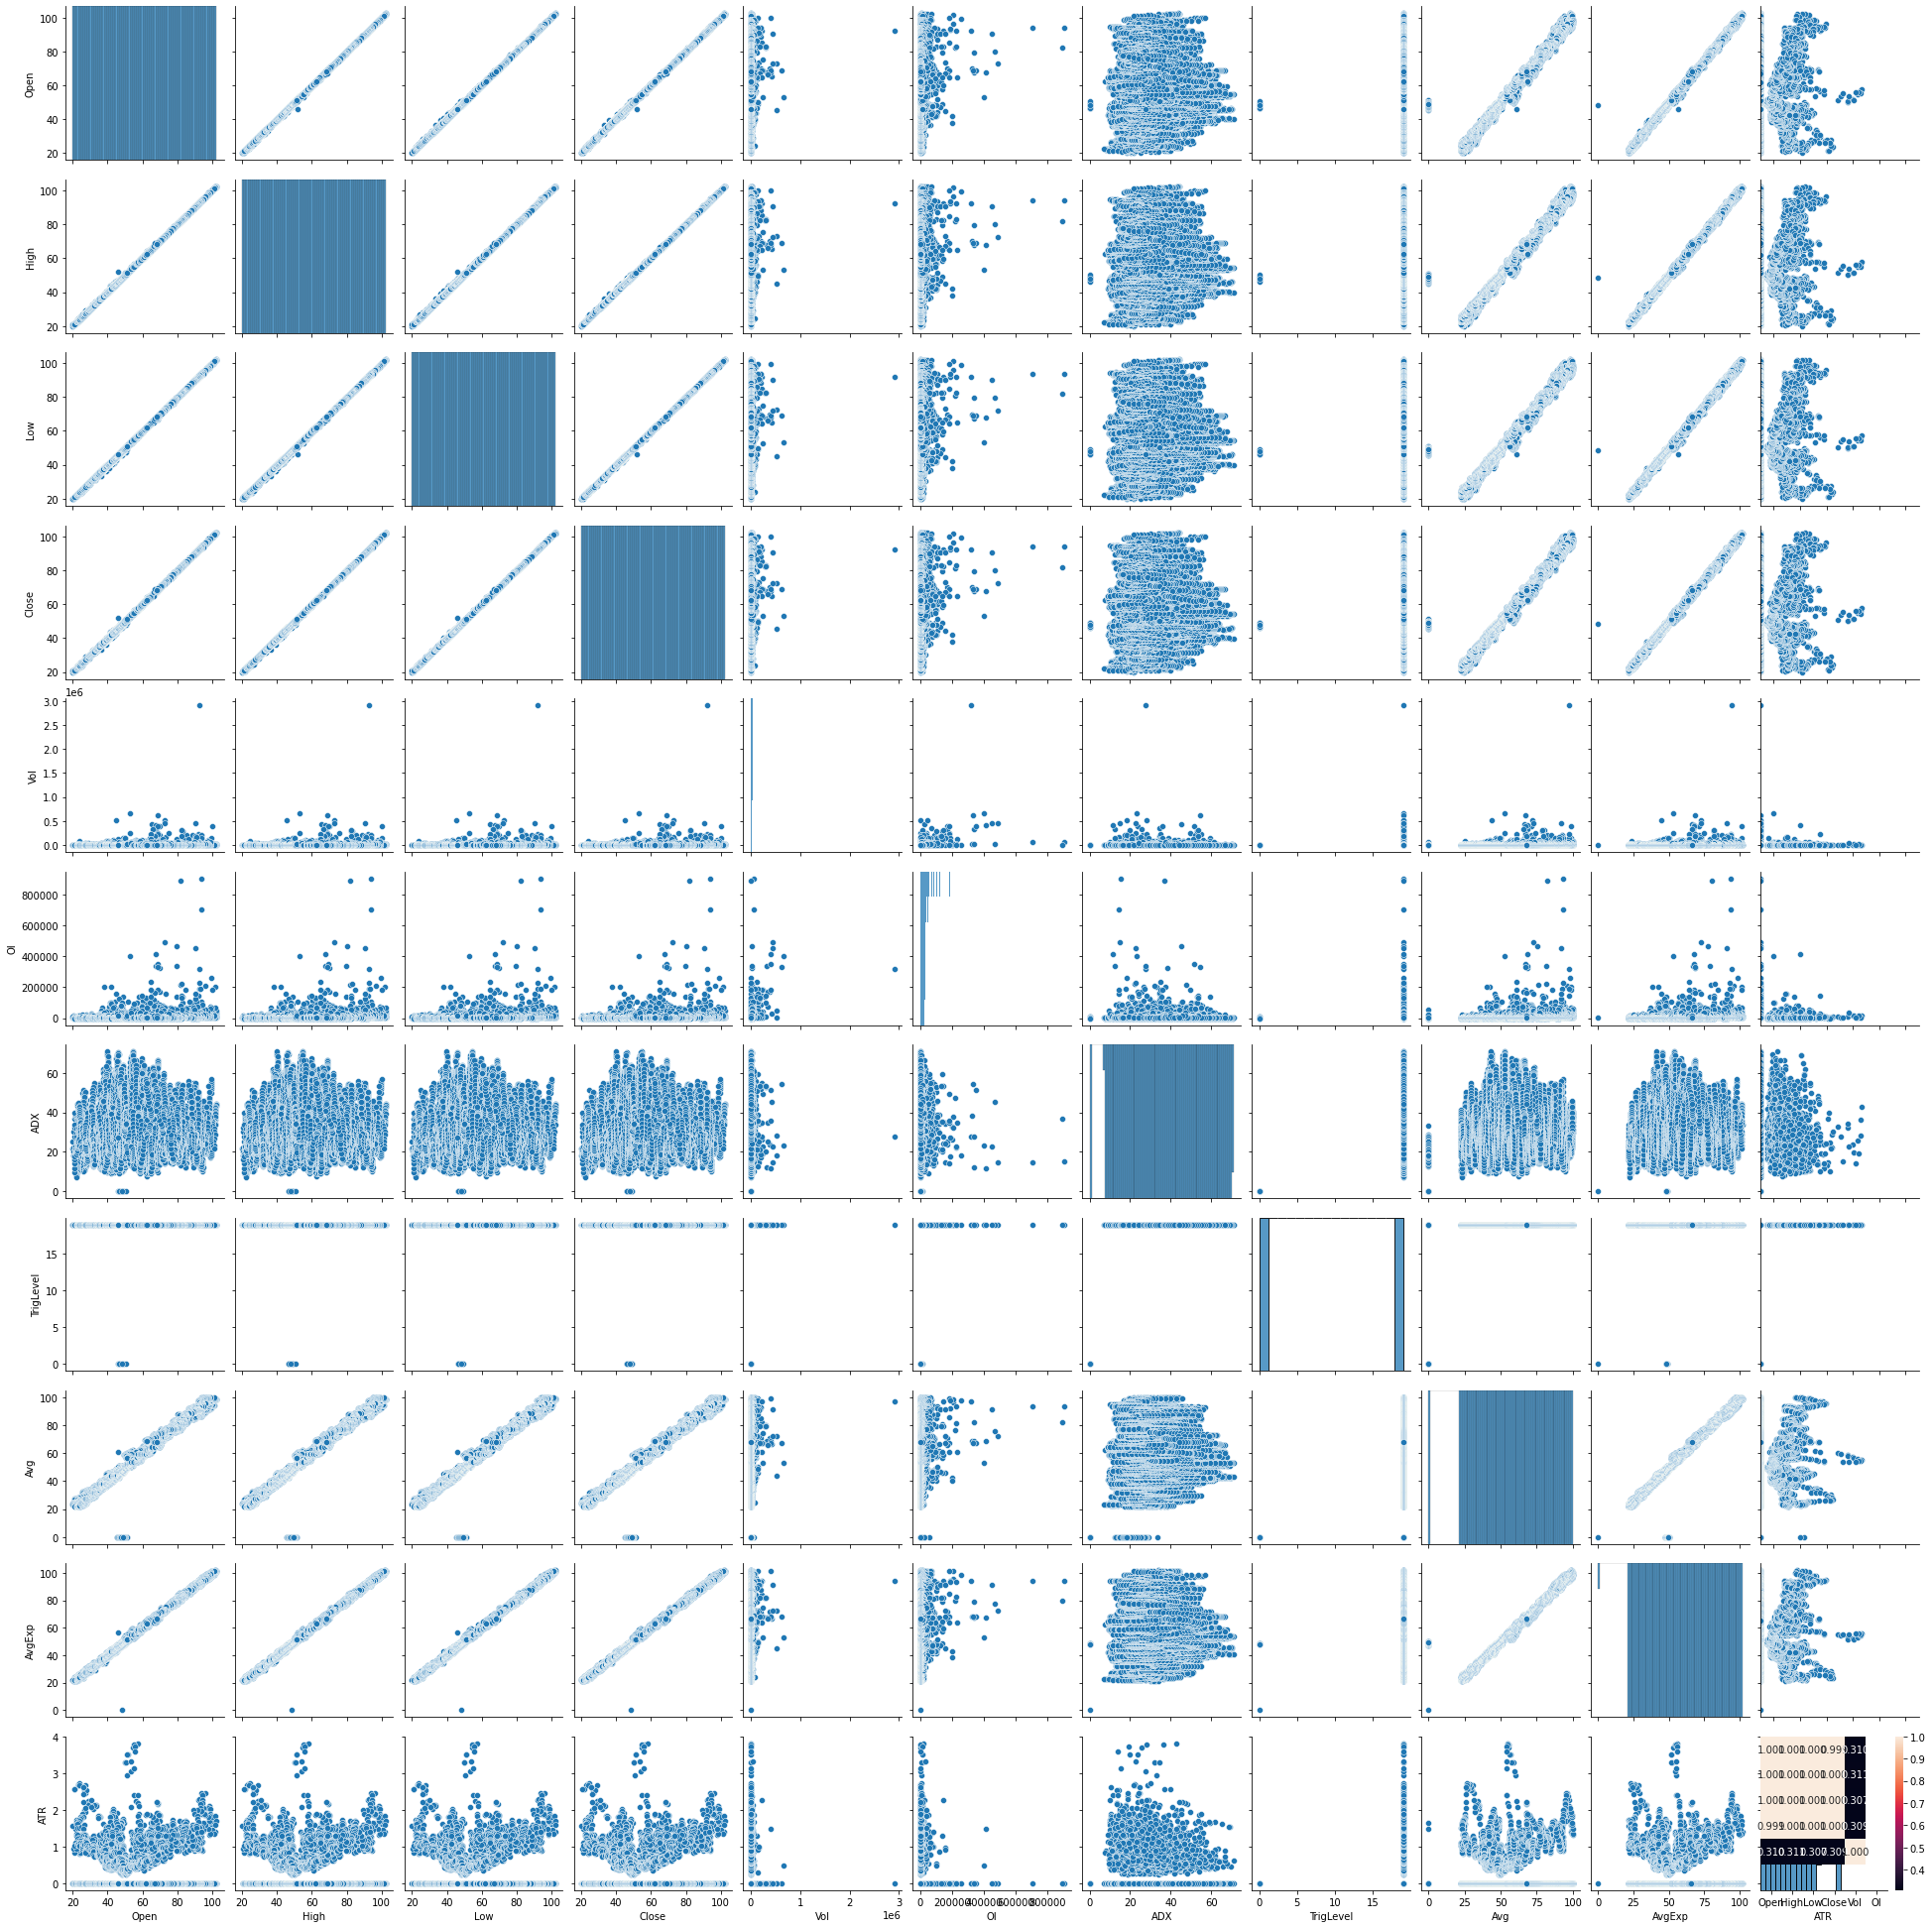

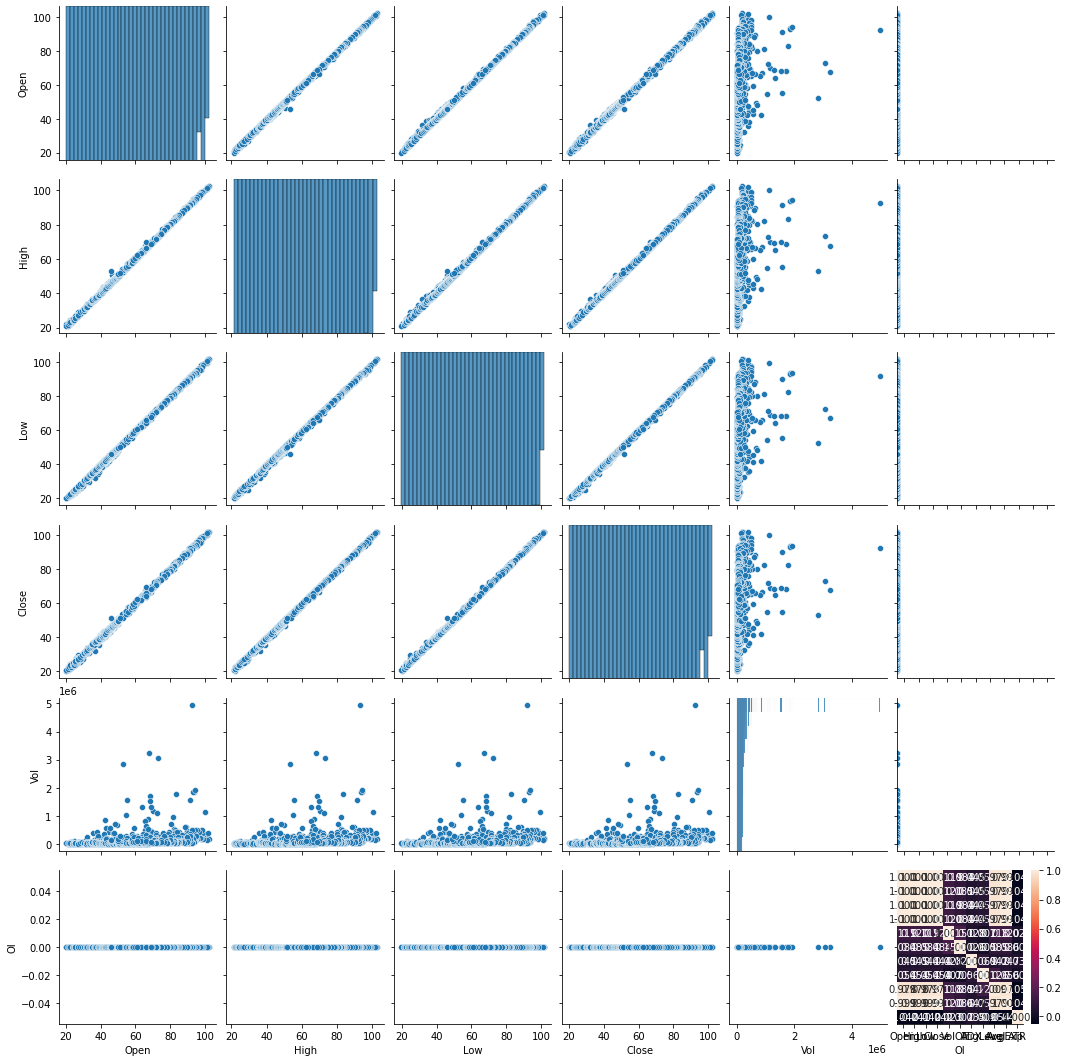

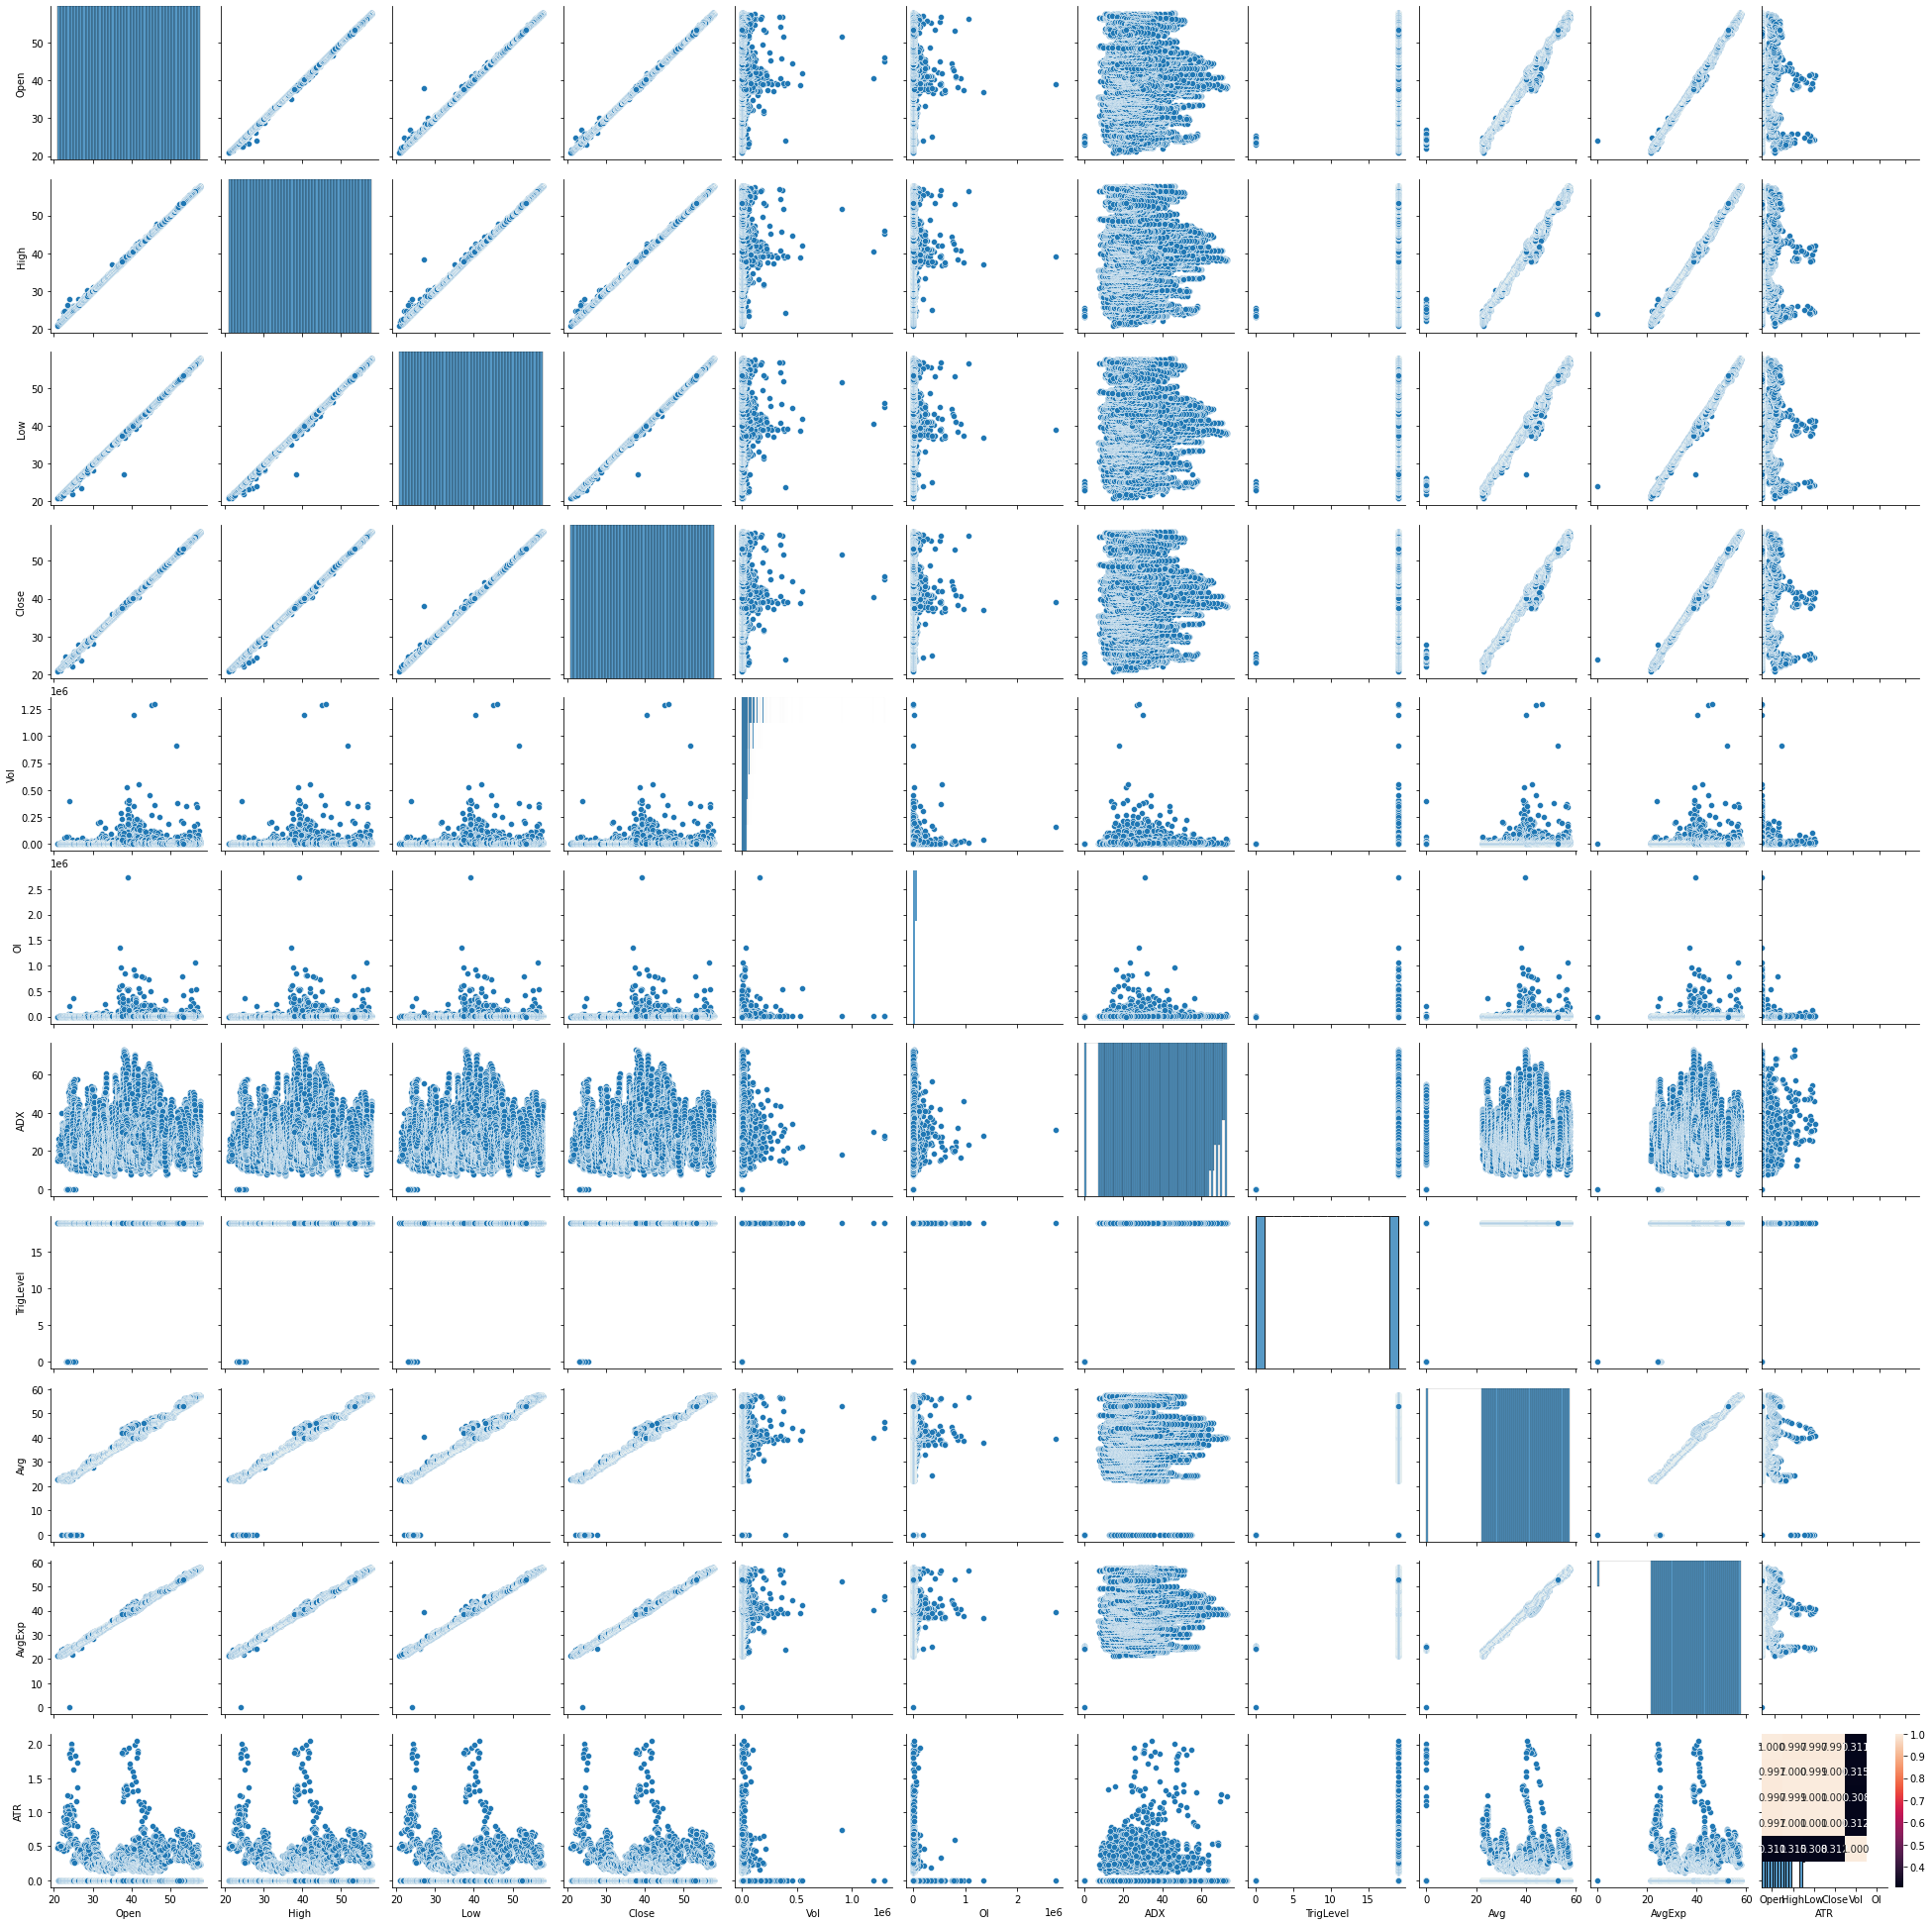

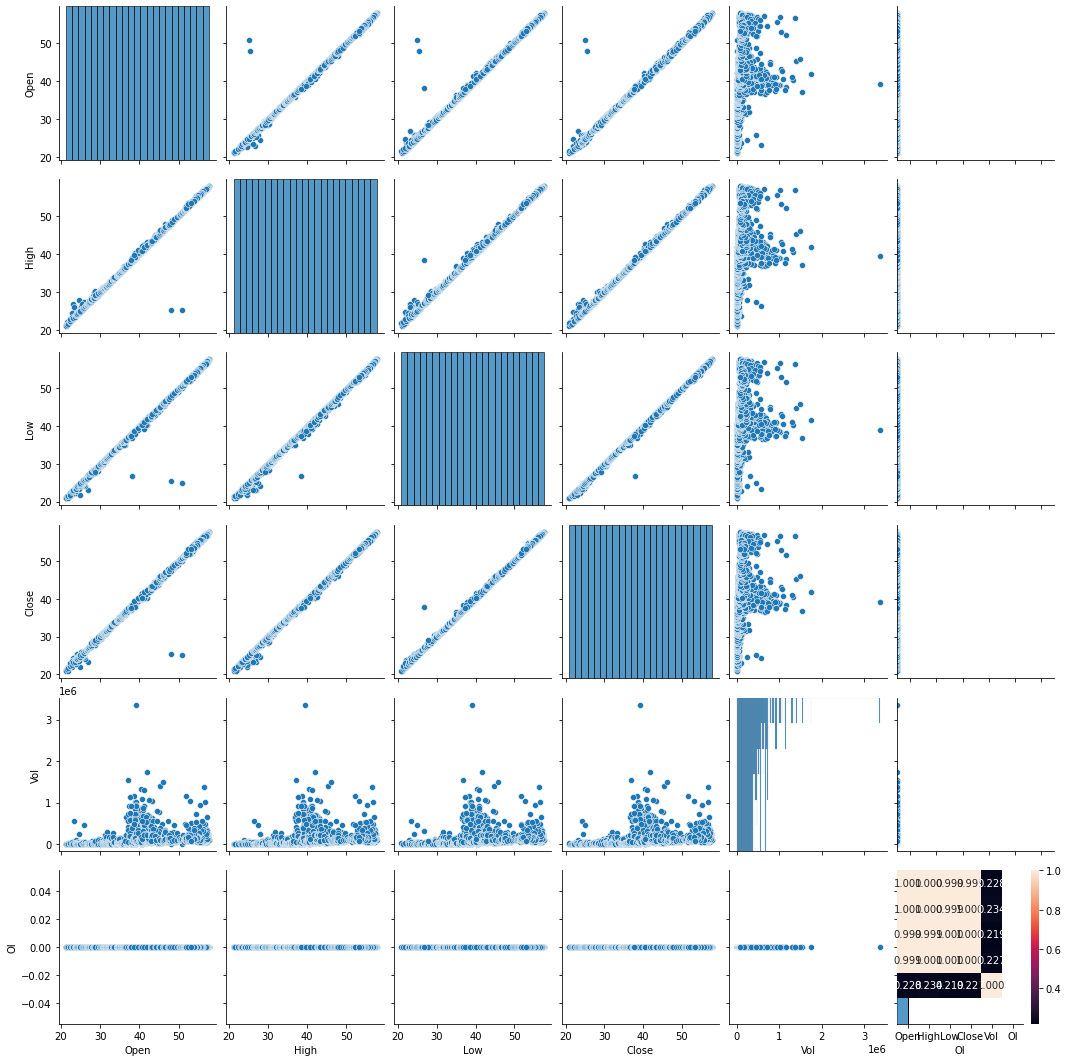

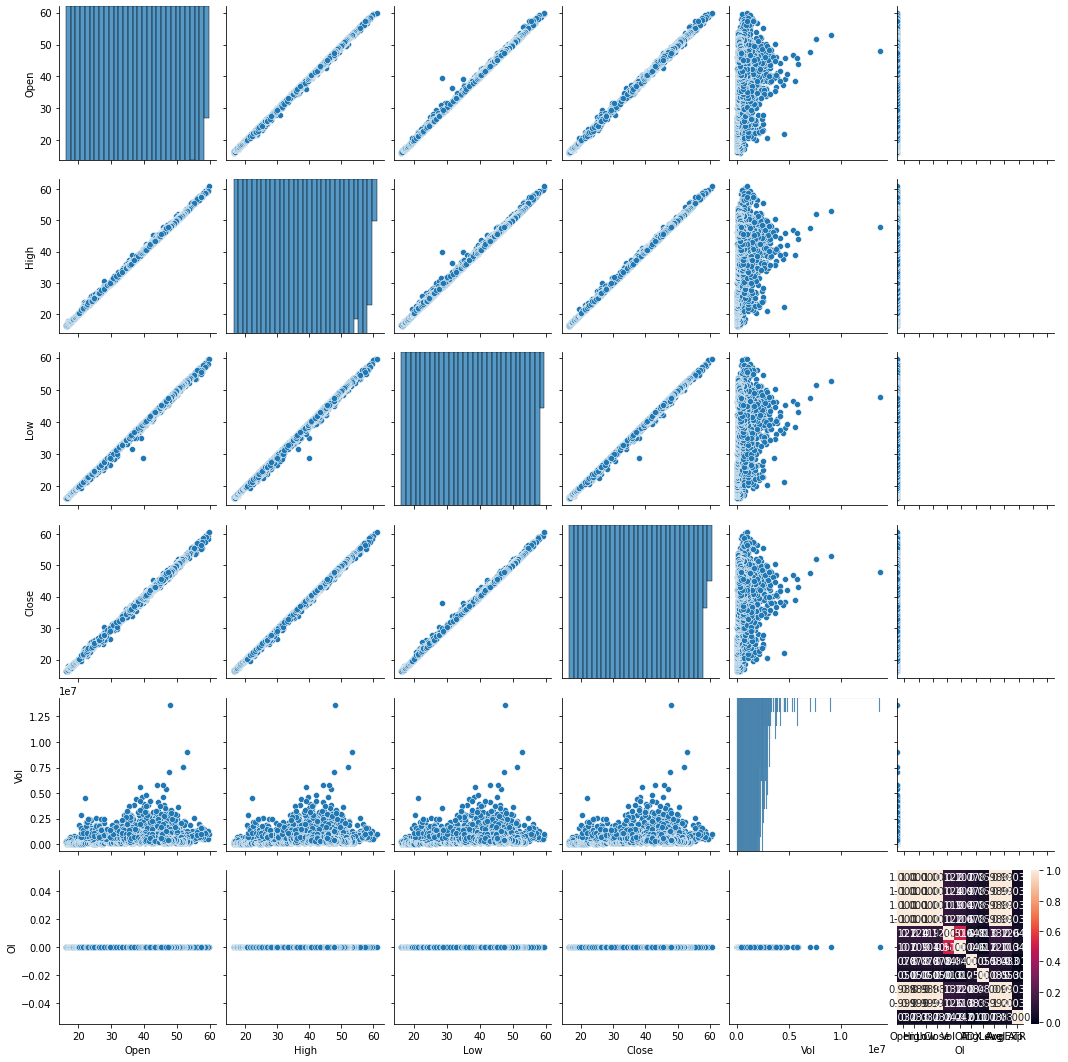

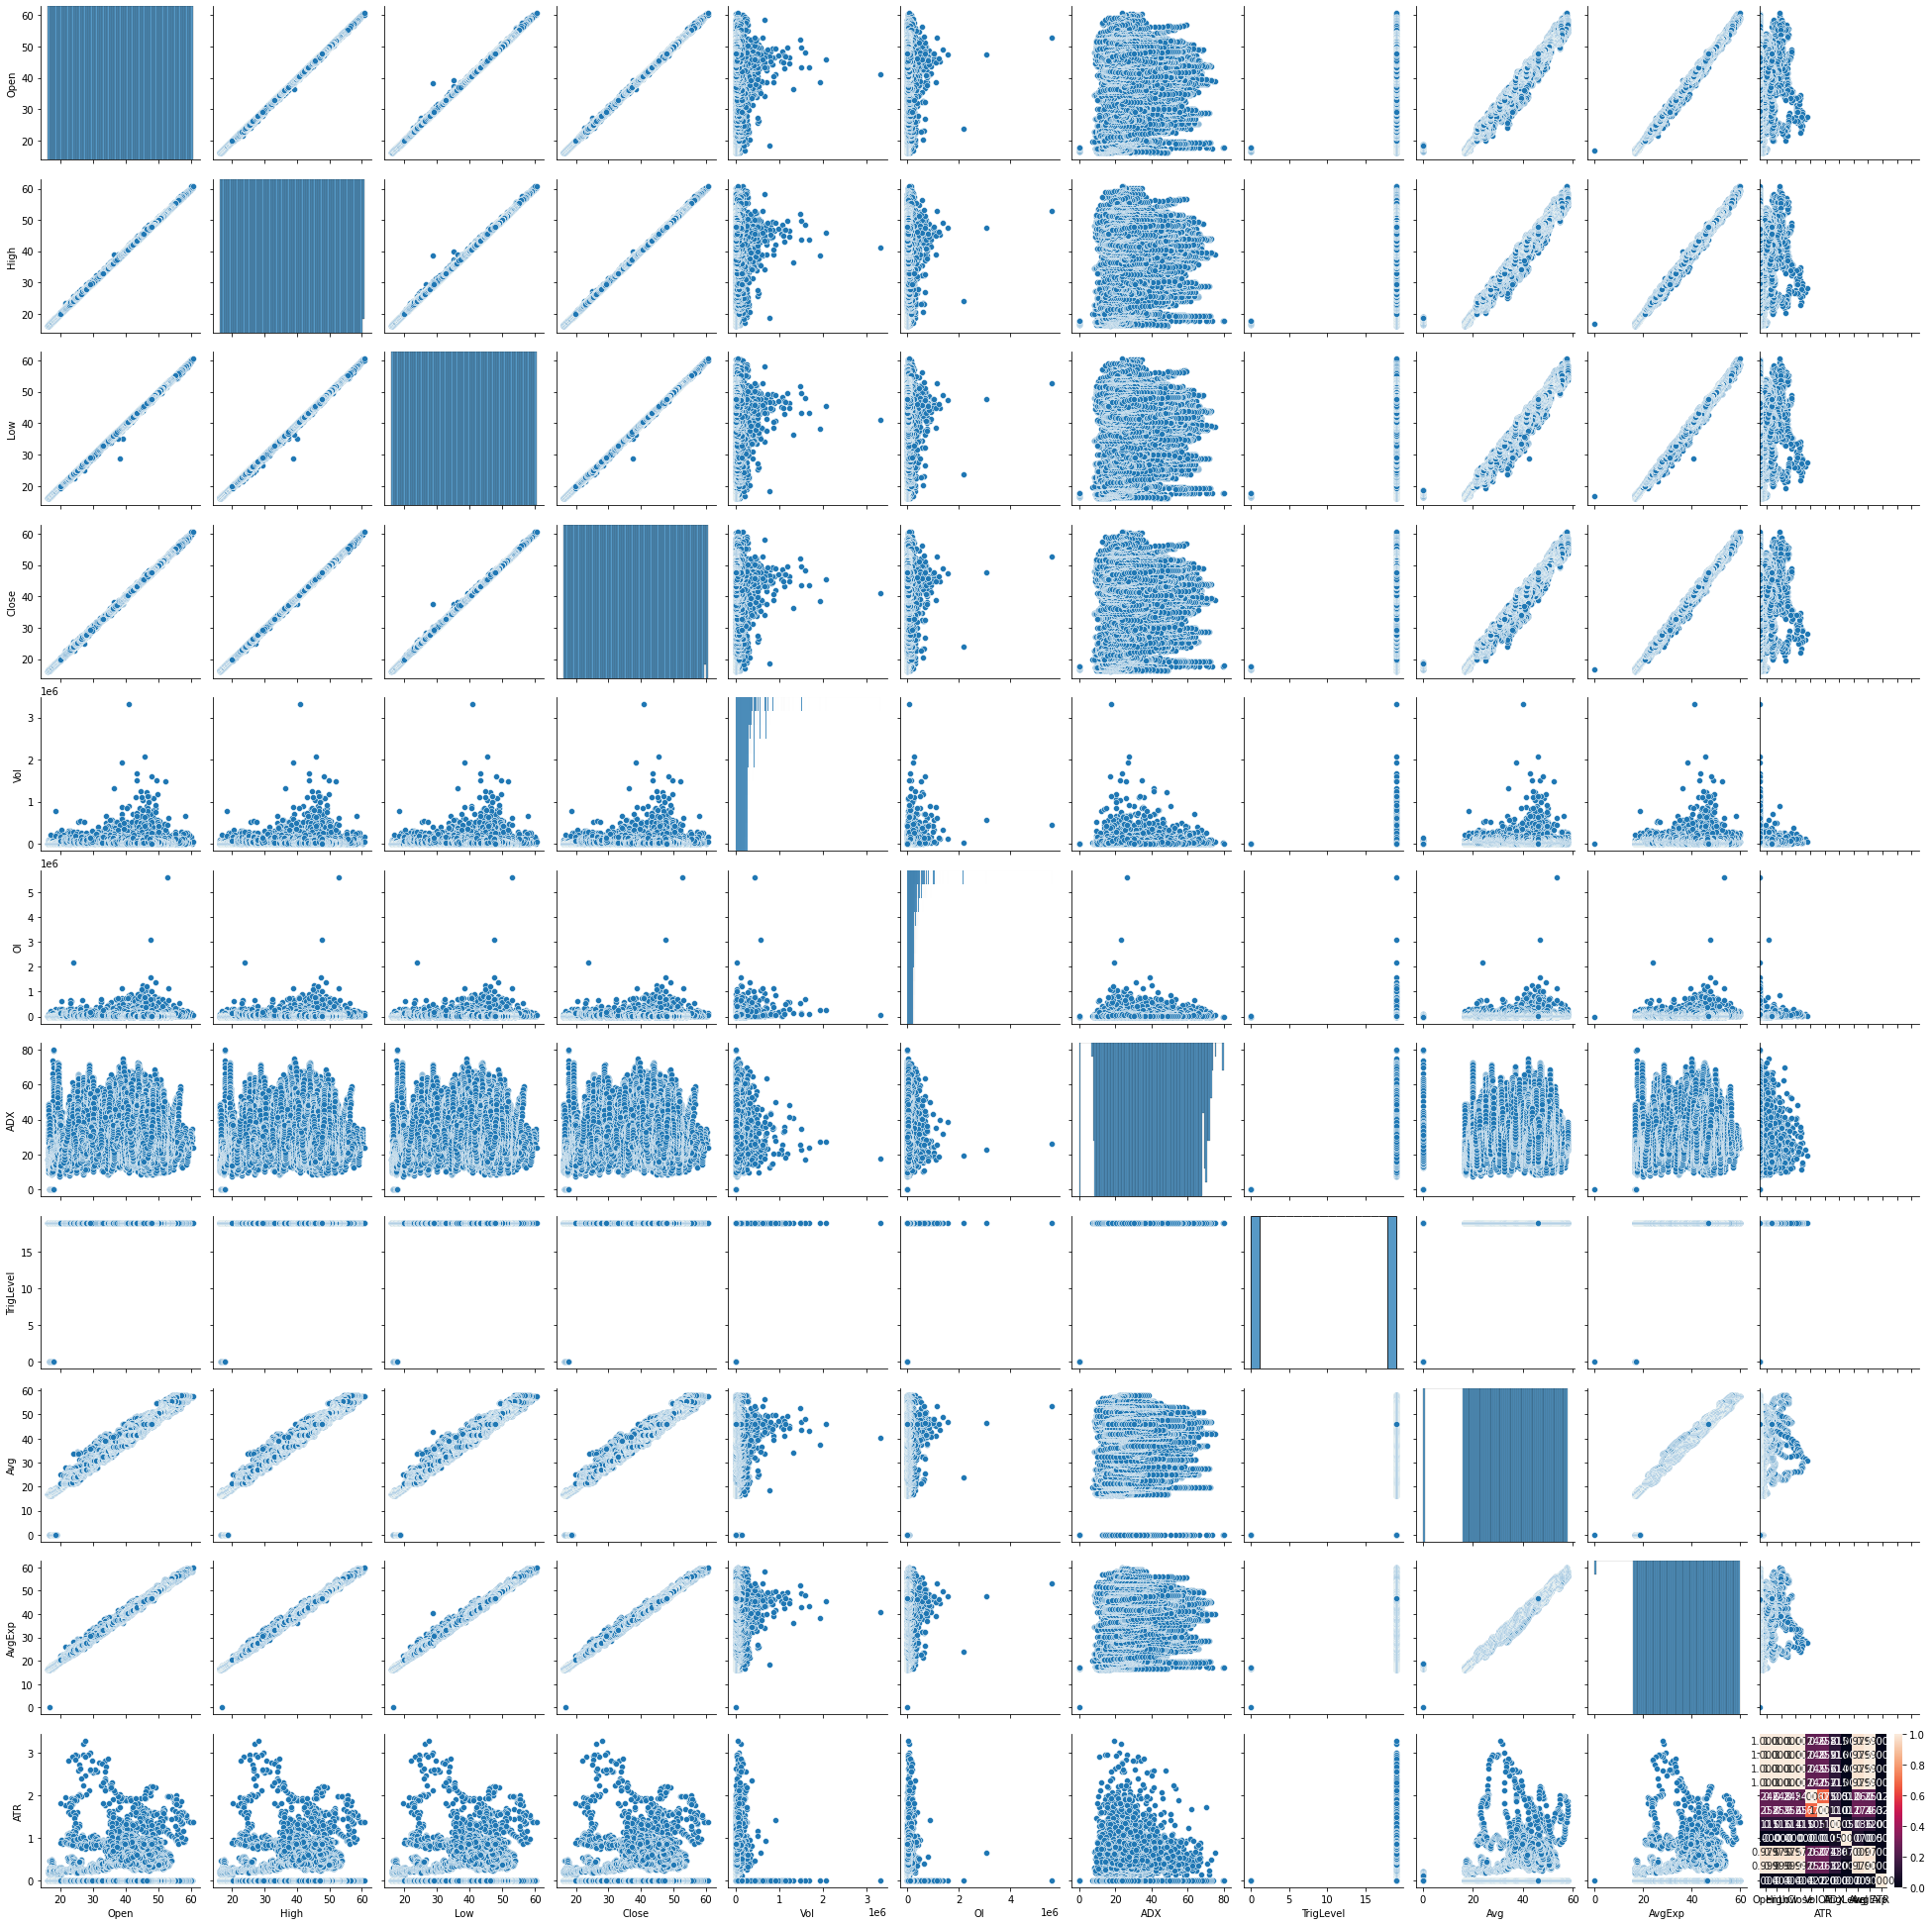

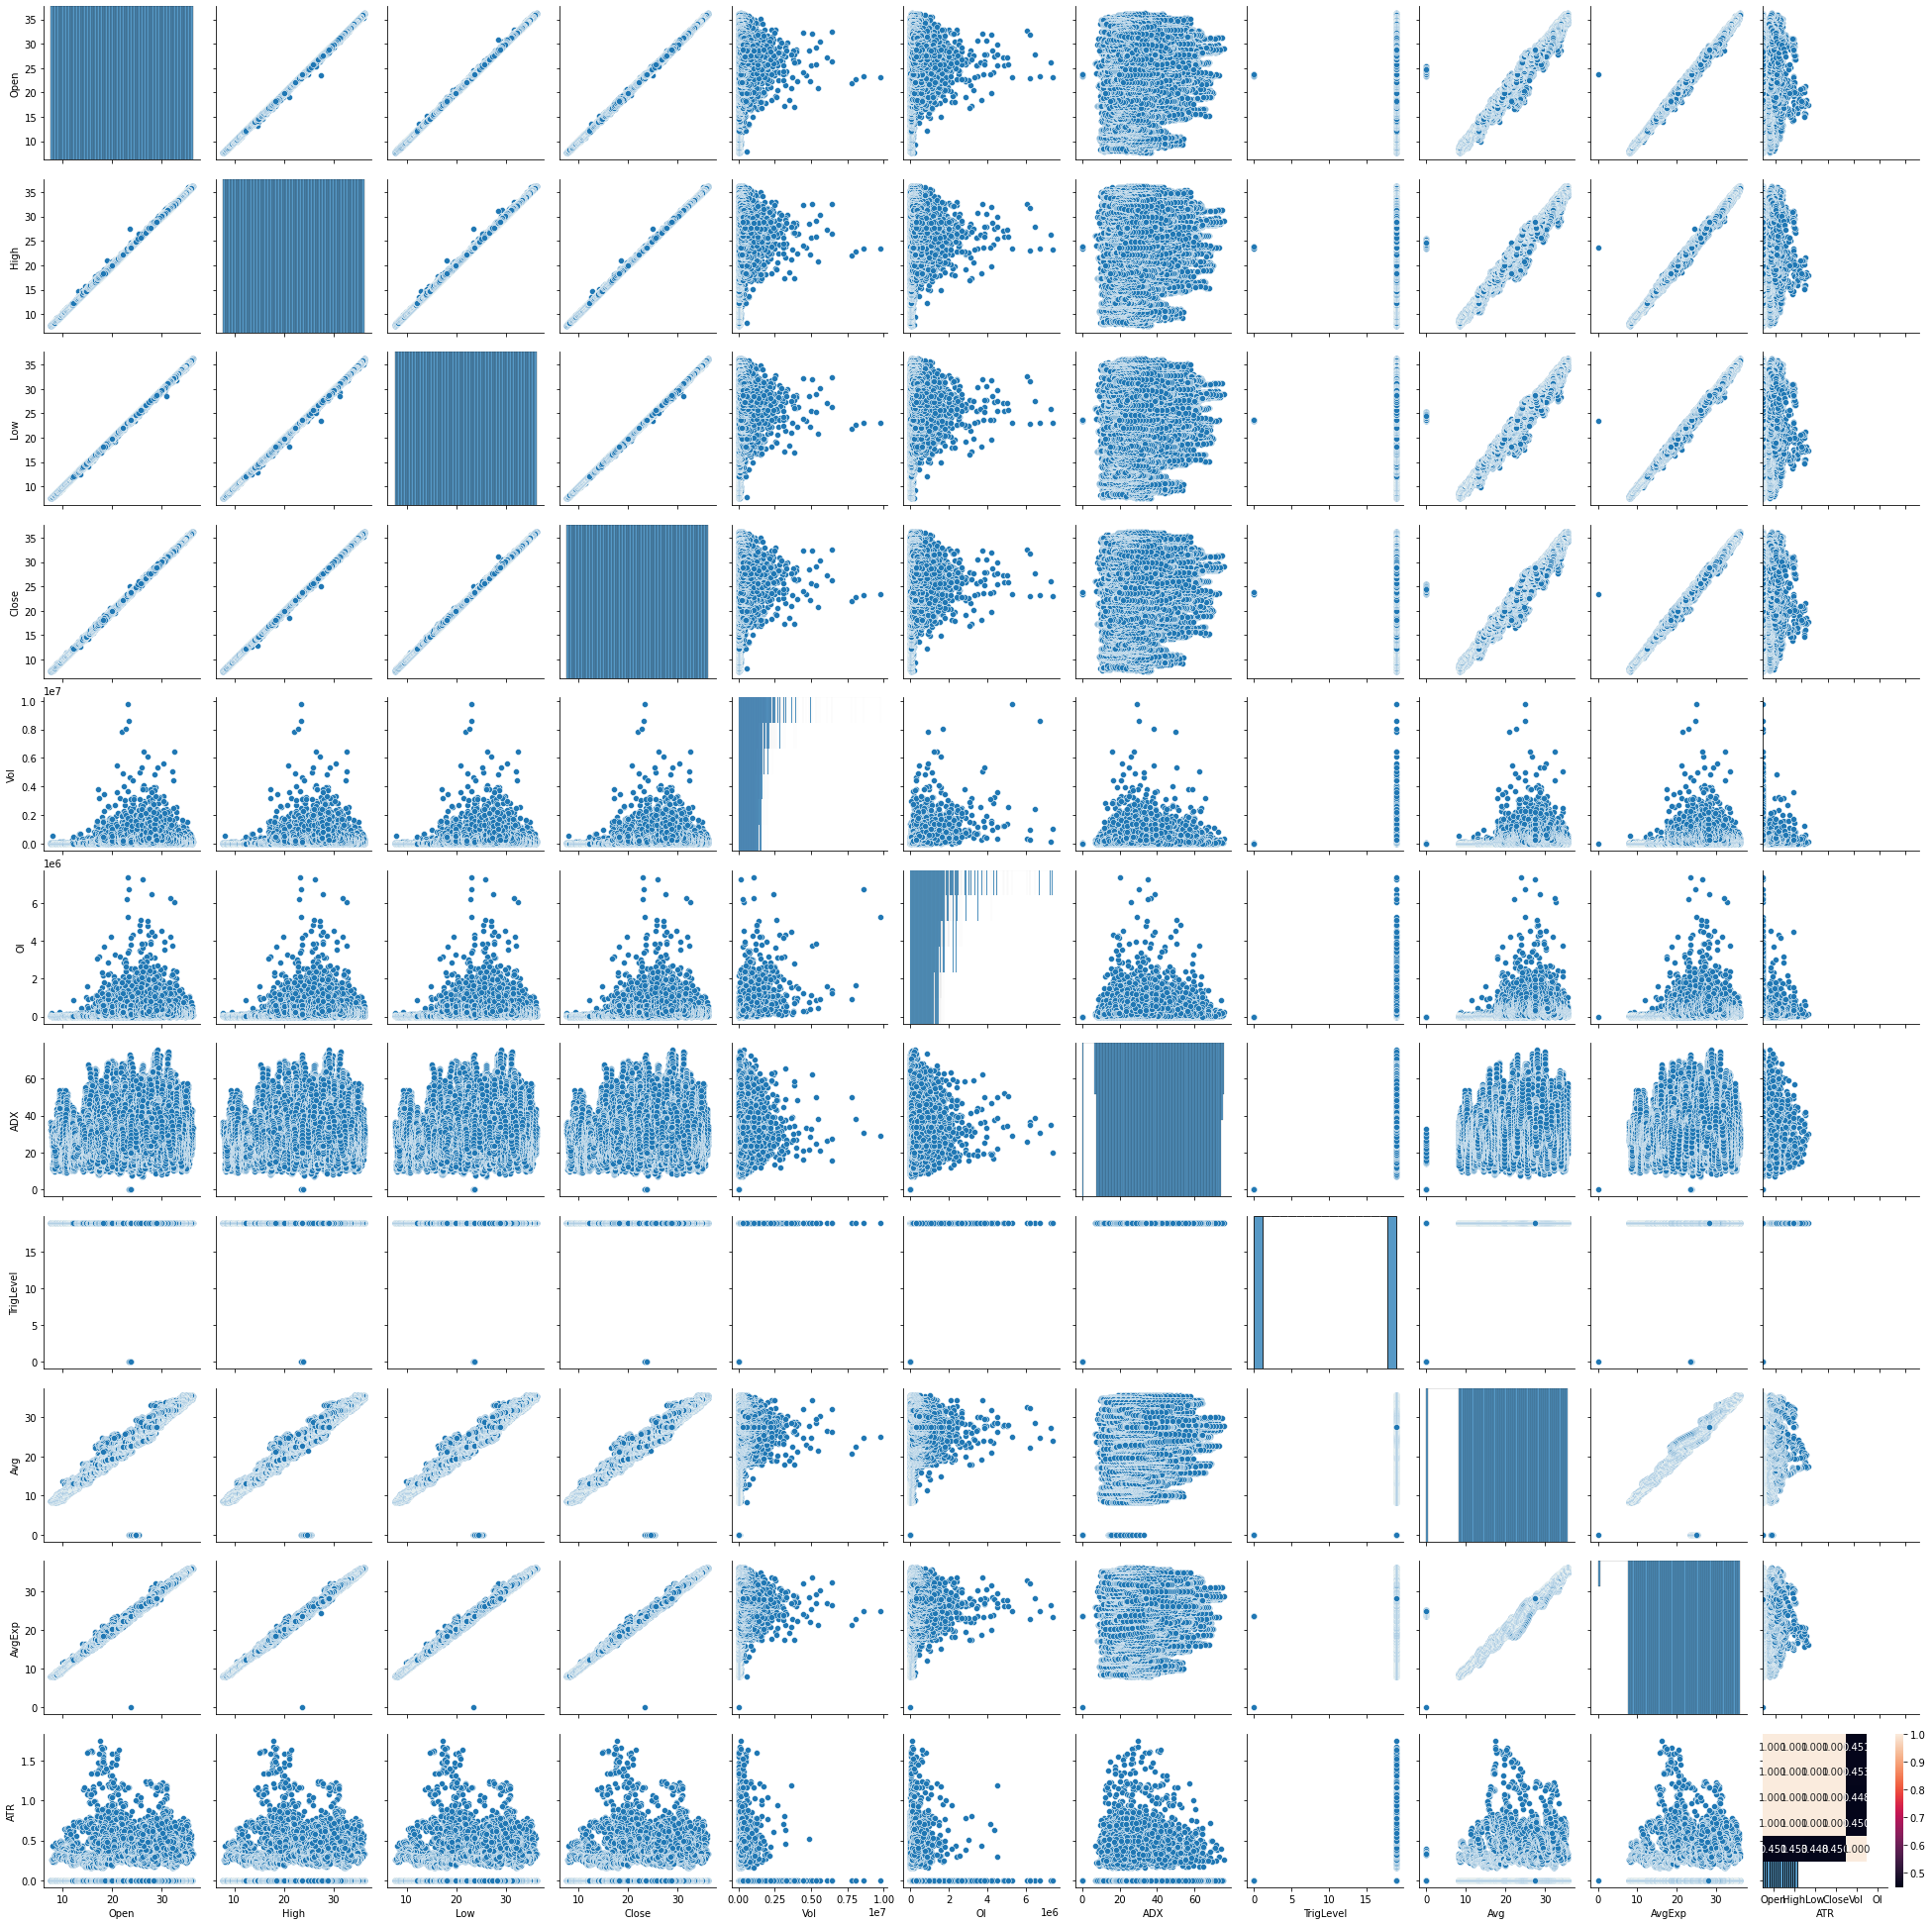

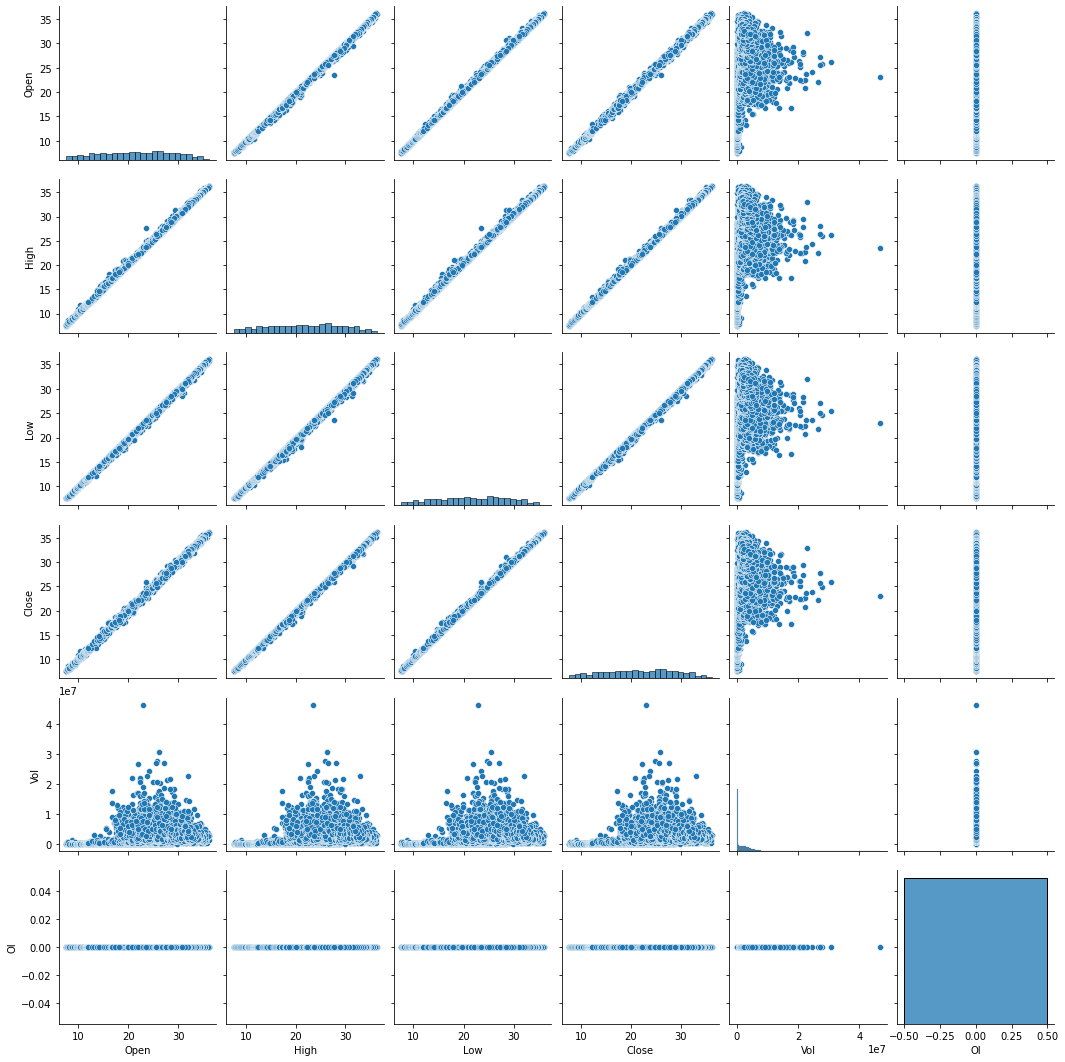

In [5]:
for i in df_list:
    corr_matrix = i.corr()
    print(i.dfname)
    #Using heatmap to visualize the correlation matrix
    sn.heatmap(corr_matrix, annot=True, fmt=".3f")
    print('\n')
    sn.pairplot(i)

In [5]:
for i in df_list:
    if(i.dfname.endswith('daily')):
        fig = go.Figure(data=[go.Candlestick(x=i.index,
                        open=i.Open,
                        high=i.High ,
                        low=i.Low,
                        close=i.Close)])
        fig.show()

In [6]:
train_X_list=[]
test_X_list=[]
train_y_list=[]
test_y_list=[]
for i in df_list:
    for j in range(4):
        '''
        print(i.drop(i.columns[j+2], axis=1))
        print(i.columns[j+2])
        '''
        
        X = i.drop(i.columns[j], axis=1).values
        y = i.iloc[:,j].values

        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)
        train_X_list.append(X_train)
        test_X_list.append(X_test)
        train_y_list.append(y_train)
        test_y_list.append(y_test)

In [7]:
len(df_list)

8

In [8]:
scaled_train_X=[]
for i in train_X_list:
    sc = MinMaxScaler(feature_range = (0, 1))
    training_scaled = sc.fit_transform(i)
    scaled_train_X.append(training_scaled)

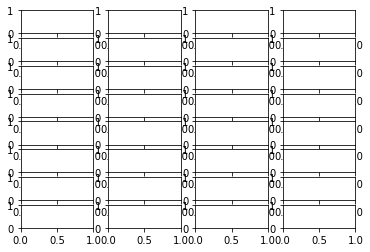

In [9]:
figure, axis = plt.subplots(8, 4)

In [25]:

model_names_list = []
counter = 0
for b in range(4):
    for i in range(8):
        predicted_price = 'predicted_price_'+str(i)
        model_name = 'model_'+str(df_list[i].dfname)+'_'+str(b)
        model_names_list.append(model_name)
        print(model_name)
        globals()[model_name] = Sequential()
        globals()[model_name].add(LSTM(units = 50, return_sequences = True, input_shape = (scaled_train_X[counter].shape[1], 1)))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50, return_sequences = True))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50, return_sequences = True))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(Dense(units = 1))
        globals()[model_name].compile(optimizer = 'adam', loss = 'mean_squared_error')
        globals()[model_name].fit(scaled_train_X[counter], train_y_list[counter], epochs = 100, batch_size = 32)
        globals()[model_name].save(model_name)
        counter+=1

model_60_min_0
Epoch 1/100
526/526 [==============================] - 10s 11ms/step - loss: 1288.4406
Epoch 2/100
526/526 [==============================] - 6s 11ms/step - loss: 417.8778
Epoch 3/100
526/526 [==============================] - 6s 11ms/step - loss: 254.7316
Epoch 4/100
526/526 [==============================] - 6s 11ms/step - loss: 239.1039
Epoch 5/100
526/526 [==============================] - 6s 11ms/step - loss: 225.4177
Epoch 6/100
526/526 [==============================] - 6s 11ms/step - loss: 92.4918
Epoch 7/100
526/526 [==============================] - 6s 11ms/step - loss: 51.6382
Epoch 8/100
526/526 [==============================] - 6s 11ms/step - loss: 33.5615
Epoch 9/100
526/526 [==============================] - 6s 11ms/step - loss: 25.1708
Epoch 10/100
526/526 [==============================] - 6s 11ms/step - loss: 20.7158
Epoch 11/100
526/526 [==============================] - 6s 11ms/step - loss: 18.3931
Epoch 12/100
526/526 [==============================

INFO:tensorflow:Assets written to: model_60_min_0\assets


INFO:tensorflow:Assets written to: model_60_min_0\assets


model_Daily_0
Epoch 1/100
526/526 [==============================] - 11s 12ms/step - loss: 1339.9178
Epoch 2/100
526/526 [==============================] - 6s 12ms/step - loss: 431.0923
Epoch 3/100
526/526 [==============================] - 6s 11ms/step - loss: 257.1615
Epoch 4/100
526/526 [==============================] - 6s 11ms/step - loss: 239.6669
Epoch 5/100
526/526 [==============================] - 6s 11ms/step - loss: 240.5111
Epoch 6/100
526/526 [==============================] - 6s 11ms/step - loss: 186.4559
Epoch 7/100
526/526 [==============================] - 6s 12ms/step - loss: 70.1855
Epoch 8/100
526/526 [==============================] - 6s 12ms/step - loss: 39.9816
Epoch 9/100
526/526 [==============================] - 6s 12ms/step - loss: 28.2333
Epoch 10/100
526/526 [==============================] - 6s 12ms/step - loss: 22.2961
Epoch 11/100
526/526 [==============================] - 6s 12ms/step - loss: 19.6789
Epoch 12/100
526/526 [==============================

INFO:tensorflow:Assets written to: model_Daily_0\assets


INFO:tensorflow:Assets written to: model_Daily_0\assets


model_AOR_60_min_0
Epoch 1/100
526/526 [==============================] - 10s 12ms/step - loss: 1287.2191
Epoch 2/100
526/526 [==============================] - 6s 11ms/step - loss: 415.5967
Epoch 3/100
526/526 [==============================] - 6s 11ms/step - loss: 253.5201
Epoch 4/100
526/526 [==============================] - 6s 12ms/step - loss: 237.4725
Epoch 5/100
526/526 [==============================] - 6s 11ms/step - loss: 237.9427
Epoch 6/100
526/526 [==============================] - 6s 11ms/step - loss: 145.0437
Epoch 7/100
526/526 [==============================] - 6s 11ms/step - loss: 56.9099
Epoch 8/100
526/526 [==============================] - 6s 11ms/step - loss: 34.3496
Epoch 9/100
526/526 [==============================] - 6s 12ms/step - loss: 25.2867
Epoch 10/100
526/526 [==============================] - 6s 11ms/step - loss: 20.4441
Epoch 11/100
526/526 [==============================] - 6s 11ms/step - loss: 19.1217
Epoch 12/100
526/526 [=========================

INFO:tensorflow:Assets written to: model_AOR_60_min_0\assets


INFO:tensorflow:Assets written to: model_AOR_60_min_0\assets


model_AOR_daily_0
Epoch 1/100
526/526 [==============================] - 12s 14ms/step - loss: 1294.8507
Epoch 2/100
526/526 [==============================] - 7s 14ms/step - loss: 410.5903
Epoch 3/100
526/526 [==============================] - 7s 14ms/step - loss: 251.5562
Epoch 4/100
526/526 [==============================] - 7s 14ms/step - loss: 239.0661
Epoch 5/100
526/526 [==============================] - 7s 14ms/step - loss: 220.1098
Epoch 6/100
526/526 [==============================] - 7s 14ms/step - loss: 86.7100
Epoch 7/100
526/526 [==============================] - 8s 15ms/step - loss: 48.0516
Epoch 8/100
526/526 [==============================] - 7s 14ms/step - loss: 31.1659
Epoch 9/100
526/526 [==============================] - 7s 14ms/step - loss: 23.7365
Epoch 10/100
526/526 [==============================] - 7s 14ms/step - loss: 19.5278
Epoch 11/100
526/526 [==============================] - 7s 14ms/step - loss: 18.4887
Epoch 12/100
526/526 [===========================

INFO:tensorflow:Assets written to: model_AOR_daily_0\assets


INFO:tensorflow:Assets written to: model_AOR_daily_0\assets


model_EPP_60_daily_0
Epoch 1/100
79/79 [==============================] - 5s 9ms/step - loss: 2295.1077
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1617.8477
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 1325.1863
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1088.3522
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 904.8267
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 749.1678
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 622.3801
Epoch 8/100
79/79 [==============================] - 1s 9ms/step - loss: 531.2643
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 454.8853
Epoch 10/100
79/79 [==============================] - 1s 9ms/step - loss: 396.8908
Epoch 11/100
79/79 [==============================] - 1s 9ms/step - loss: 343.9110
Epoch 12/100
79/79 [==============================] - 1s 9ms/step - los

INFO:tensorflow:Assets written to: model_EPP_60_daily_0\assets


INFO:tensorflow:Assets written to: model_EPP_60_daily_0\assets


model_EPP_60_min_0
Epoch 1/100
79/79 [==============================] - 5s 11ms/step - loss: 2280.1255
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1574.9658
Epoch 3/100
79/79 [==============================] - 1s 10ms/step - loss: 1291.1624
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1065.4633
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 879.4020
Epoch 6/100
79/79 [==============================] - 1s 10ms/step - loss: 727.4565
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 606.6158
Epoch 8/100
79/79 [==============================] - 1s 9ms/step - loss: 511.9353
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 437.3782
Epoch 10/100
79/79 [==============================] - 1s 9ms/step - loss: 383.3156
Epoch 11/100
79/79 [==============================] - 1s 10ms/step - loss: 334.6558
Epoch 12/100
79/79 [==============================] - 1s 9ms/step - l

INFO:tensorflow:Assets written to: model_EPP_60_min_0\assets


INFO:tensorflow:Assets written to: model_EPP_60_min_0\assets


model_EWG_60_min_0
Epoch 1/100
79/79 [==============================] - 5s 9ms/step - loss: 2204.7190
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1516.2324
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 1237.4952
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1018.4773
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 839.3391
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 693.6487
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 579.4850
Epoch 8/100
79/79 [==============================] - 1s 9ms/step - loss: 493.3126
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 420.3439
Epoch 10/100
79/79 [==============================] - 1s 9ms/step - loss: 363.0833
Epoch 11/100
79/79 [==============================] - 1s 9ms/step - loss: 326.5884
Epoch 12/100
79/79 [==============================] - 1s 9ms/step - loss:

INFO:tensorflow:Assets written to: model_EWG_60_min_0\assets


INFO:tensorflow:Assets written to: model_EWG_60_min_0\assets


model_EWG_daily_0
Epoch 1/100
79/79 [==============================] - 5s 9ms/step - loss: 2257.2532
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 1554.2438
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 1273.8329
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 1046.0284
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 866.0579
Epoch 6/100
79/79 [==============================] - 1s 9ms/step - loss: 720.0085
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 598.9240
Epoch 8/100
79/79 [==============================] - 1s 9ms/step - loss: 509.7859
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 434.9324
Epoch 10/100
79/79 [==============================] - 1s 9ms/step - loss: 379.9729
Epoch 11/100
79/79 [==============================] - 1s 9ms/step - loss: 337.6823
Epoch 12/100
79/79 [==============================] - 1s 9ms/step - loss: 

INFO:tensorflow:Assets written to: model_EWG_daily_0\assets


INFO:tensorflow:Assets written to: model_EWG_daily_0\assets


model_60_min_1
Epoch 1/100
485/485 [==============================] - 11s 14ms/step - loss: 553.7997
Epoch 2/100
485/485 [==============================] - 7s 14ms/step - loss: 113.6064
Epoch 3/100
485/485 [==============================] - 7s 13ms/step - loss: 71.6698
Epoch 4/100
485/485 [==============================] - 7s 14ms/step - loss: 69.8730
Epoch 5/100
485/485 [==============================] - 7s 14ms/step - loss: 69.8937
Epoch 6/100
485/485 [==============================] - 7s 14ms/step - loss: 37.0829
Epoch 7/100
485/485 [==============================] - 7s 14ms/step - loss: 15.2861
Epoch 8/100
485/485 [==============================] - 7s 14ms/step - loss: 11.0425
Epoch 9/100
485/485 [==============================] - 7s 14ms/step - loss: 10.0041
Epoch 10/100
485/485 [==============================] - 7s 14ms/step - loss: 9.8551
Epoch 11/100
485/485 [==============================] - 7s 14ms/step - loss: 9.3558
Epoch 12/100
485/485 [==============================] - 7s

INFO:tensorflow:Assets written to: model_60_min_1\assets


INFO:tensorflow:Assets written to: model_60_min_1\assets


model_Daily_1
Epoch 1/100
485/485 [==============================] - 11s 14ms/step - loss: 539.3155
Epoch 2/100
485/485 [==============================] - 7s 14ms/step - loss: 109.3819
Epoch 3/100
485/485 [==============================] - 7s 14ms/step - loss: 71.9057
Epoch 4/100
485/485 [==============================] - 7s 14ms/step - loss: 69.5670
Epoch 5/100
485/485 [==============================] - 7s 14ms/step - loss: 64.6232
Epoch 6/100
485/485 [==============================] - 7s 14ms/step - loss: 21.0472
Epoch 7/100
485/485 [==============================] - 7s 14ms/step - loss: 13.3745
Epoch 8/100
485/485 [==============================] - 7s 14ms/step - loss: 10.7020
Epoch 9/100
485/485 [==============================] - 7s 14ms/step - loss: 9.7113
Epoch 10/100
485/485 [==============================] - 7s 14ms/step - loss: 9.4050
Epoch 11/100
485/485 [==============================] - 7s 14ms/step - loss: 9.1066
Epoch 12/100
485/485 [==============================] - 7s 1

INFO:tensorflow:Assets written to: model_Daily_1\assets


INFO:tensorflow:Assets written to: model_Daily_1\assets


model_AOR_60_min_1
Epoch 1/100
485/485 [==============================] - 11s 14ms/step - loss: 562.7285
Epoch 2/100
485/485 [==============================] - 7s 14ms/step - loss: 114.8514
Epoch 3/100
485/485 [==============================] - 7s 14ms/step - loss: 71.0972
Epoch 4/100
485/485 [==============================] - 7s 15ms/step - loss: 70.1286
Epoch 5/100
485/485 [==============================] - 7s 14ms/step - loss: 47.1968
Epoch 6/100
485/485 [==============================] - 7s 14ms/step - loss: 17.6163
Epoch 7/100
485/485 [==============================] - 7s 14ms/step - loss: 11.7584
Epoch 8/100
485/485 [==============================] - 7s 14ms/step - loss: 9.8934
Epoch 9/100
485/485 [==============================] - 7s 14ms/step - loss: 9.4148
Epoch 10/100
485/485 [==============================] - 7s 14ms/step - loss: 9.2455
Epoch 11/100
485/485 [==============================] - 7s 14ms/step - loss: 9.0846
Epoch 12/100
485/485 [==============================] - 

INFO:tensorflow:Assets written to: model_AOR_60_min_1\assets


INFO:tensorflow:Assets written to: model_AOR_60_min_1\assets


model_AOR_daily_1
Epoch 1/100
485/485 [==============================] - 11s 14ms/step - loss: 526.5288
Epoch 2/100
485/485 [==============================] - 7s 14ms/step - loss: 102.4398
Epoch 3/100
485/485 [==============================] - 7s 14ms/step - loss: 70.2774
Epoch 4/100
485/485 [==============================] - 7s 14ms/step - loss: 69.3827
Epoch 5/100
485/485 [==============================] - 7s 14ms/step - loss: 67.2947
Epoch 6/100
485/485 [==============================] - 7s 14ms/step - loss: 21.7687
Epoch 7/100
485/485 [==============================] - 7s 14ms/step - loss: 12.7912
Epoch 8/100
485/485 [==============================] - 7s 14ms/step - loss: 10.2328
Epoch 9/100
485/485 [==============================] - 7s 14ms/step - loss: 9.2851
Epoch 10/100
485/485 [==============================] - 7s 14ms/step - loss: 9.1966
Epoch 11/100
485/485 [==============================] - 7s 15ms/step - loss: 8.7358
Epoch 12/100
485/485 [==============================] - 

INFO:tensorflow:Assets written to: model_AOR_daily_1\assets


INFO:tensorflow:Assets written to: model_AOR_daily_1\assets


model_EPP_60_daily_1
Epoch 1/100
74/74 [==============================] - 5s 9ms/step - loss: 1144.5195
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 642.7519
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 476.3386
Epoch 4/100
74/74 [==============================] - 1s 9ms/step - loss: 352.7721
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 267.4904
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 201.6607
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 158.5540
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 125.5516
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 106.0996
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 96.2469
Epoch 11/100
74/74 [==============================] - 1s 9ms/step - loss: 84.7470
Epoch 12/100
74/74 [==============================] - 1s 9ms/step - loss: 81

INFO:tensorflow:Assets written to: model_EPP_60_daily_1\assets


INFO:tensorflow:Assets written to: model_EPP_60_daily_1\assets


model_EPP_60_min_1
Epoch 1/100
74/74 [==============================] - 5s 8ms/step - loss: 1190.2617
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 720.8718
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 545.2230
Epoch 4/100
74/74 [==============================] - 1s 9ms/step - loss: 414.2036
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 315.4948
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 239.7949
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 188.3851
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 148.9997
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 122.7521
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 102.6406
Epoch 11/100
74/74 [==============================] - 1s 9ms/step - loss: 92.3132
Epoch 12/100
74/74 [==============================] - 1s 9ms/step - loss: 85.

INFO:tensorflow:Assets written to: model_EPP_60_min_1\assets


INFO:tensorflow:Assets written to: model_EPP_60_min_1\assets


model_EWG_60_min_1
Epoch 1/100
74/74 [==============================] - 5s 9ms/step - loss: 1199.1674
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 724.7867
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 544.7714
Epoch 4/100
74/74 [==============================] - 1s 9ms/step - loss: 410.4557
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 310.9039
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 237.8152
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 182.4994
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 146.9211
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 118.5382
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 102.4043
Epoch 11/100
74/74 [==============================] - 1s 9ms/step - loss: 90.4287
Epoch 12/100
74/74 [==============================] - 1s 9ms/step - loss: 84.

INFO:tensorflow:Assets written to: model_EWG_60_min_1\assets


INFO:tensorflow:Assets written to: model_EWG_60_min_1\assets


model_EWG_daily_1
Epoch 1/100
74/74 [==============================] - 7s 9ms/step - loss: 1141.1128
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 656.2460
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 485.7765
Epoch 4/100
74/74 [==============================] - 1s 9ms/step - loss: 364.7704
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 273.7609
Epoch 6/100
74/74 [==============================] - 1s 11ms/step - loss: 208.7685
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 162.0231
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 131.1026
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 107.6602
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 94.4274
Epoch 11/100
74/74 [==============================] - 1s 9ms/step - loss: 85.9557
Epoch 12/100
74/74 [==============================] - 1s 9ms/step - loss: 81.7

INFO:tensorflow:Assets written to: model_EWG_daily_1\assets


INFO:tensorflow:Assets written to: model_EWG_daily_1\assets


model_60_min_2
Epoch 1/100
112/112 [==============================] - 4s 6ms/step - loss: 1029.3187
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 550.1540
Epoch 3/100
112/112 [==============================] - 1s 6ms/step - loss: 365.6675
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 249.0966
Epoch 5/100
112/112 [==============================] - 1s 6ms/step - loss: 179.8914
Epoch 6/100
112/112 [==============================] - 1s 7ms/step - loss: 142.0403
Epoch 7/100
112/112 [==============================] - 1s 6ms/step - loss: 122.7030
Epoch 8/100
112/112 [==============================] - 1s 6ms/step - loss: 113.8784
Epoch 9/100
112/112 [==============================] - 1s 6ms/step - loss: 108.4406
Epoch 10/100
112/112 [==============================] - 1s 6ms/step - loss: 91.1211
Epoch 11/100
112/112 [==============================] - 1s 6ms/step - loss: 38.2321
Epoch 12/100
112/112 [==============================] - 1s 7

INFO:tensorflow:Assets written to: model_60_min_2\assets


INFO:tensorflow:Assets written to: model_60_min_2\assets


model_Daily_2
Epoch 1/100
112/112 [==============================] - 4s 6ms/step - loss: 1014.6387
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 545.4459
Epoch 3/100
112/112 [==============================] - 1s 6ms/step - loss: 363.5224
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 249.4349
Epoch 5/100
112/112 [==============================] - 1s 6ms/step - loss: 181.0358
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 142.5094
Epoch 7/100
112/112 [==============================] - 1s 6ms/step - loss: 123.2815
Epoch 8/100
112/112 [==============================] - 1s 7ms/step - loss: 112.1104
Epoch 9/100
112/112 [==============================] - 1s 6ms/step - loss: 110.1469
Epoch 10/100
112/112 [==============================] - 1s 7ms/step - loss: 108.7438
Epoch 11/100
112/112 [==============================] - 1s 6ms/step - loss: 50.8530
Epoch 12/100
112/112 [==============================] - 1s 6

INFO:tensorflow:Assets written to: model_Daily_2\assets


INFO:tensorflow:Assets written to: model_Daily_2\assets


model_AOR_60_min_2
Epoch 1/100
112/112 [==============================] - 4s 6ms/step - loss: 1035.2449
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 579.9659
Epoch 3/100
112/112 [==============================] - 1s 6ms/step - loss: 386.6621
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 264.4254
Epoch 5/100
112/112 [==============================] - 1s 6ms/step - loss: 190.8436
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 146.0557
Epoch 7/100
112/112 [==============================] - 1s 7ms/step - loss: 123.3155
Epoch 8/100
112/112 [==============================] - 1s 6ms/step - loss: 113.4732
Epoch 9/100
112/112 [==============================] - 1s 7ms/step - loss: 108.7286
Epoch 10/100
112/112 [==============================] - 1s 6ms/step - loss: 108.1885
Epoch 11/100
112/112 [==============================] - 1s 7ms/step - loss: 105.1393
Epoch 12/100
112/112 [==============================] 

INFO:tensorflow:Assets written to: model_AOR_60_min_2\assets


INFO:tensorflow:Assets written to: model_AOR_60_min_2\assets


model_AOR_daily_2
Epoch 1/100
112/112 [==============================] - 5s 7ms/step - loss: 1019.9538
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 554.6697
Epoch 3/100
112/112 [==============================] - 1s 6ms/step - loss: 372.2825
Epoch 4/100
112/112 [==============================] - 1s 7ms/step - loss: 253.8313
Epoch 5/100
112/112 [==============================] - 1s 6ms/step - loss: 185.6962
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 143.8576
Epoch 7/100
112/112 [==============================] - 1s 6ms/step - loss: 122.8304
Epoch 8/100
112/112 [==============================] - 1s 7ms/step - loss: 113.2055
Epoch 9/100
112/112 [==============================] - 1s 6ms/step - loss: 109.7217
Epoch 10/100
112/112 [==============================] - 1s 6ms/step - loss: 107.3927
Epoch 11/100
112/112 [==============================] - 1s 6ms/step - loss: 107.0073
Epoch 12/100
112/112 [==============================] -

INFO:tensorflow:Assets written to: model_AOR_daily_2\assets


INFO:tensorflow:Assets written to: model_AOR_daily_2\assets


model_EPP_60_daily_2
Epoch 1/100
765/765 [==============================] - 15s 14ms/step - loss: 434.0706
Epoch 2/100
765/765 [==============================] - 10s 14ms/step - loss: 104.4041
Epoch 3/100
765/765 [==============================] - 11s 14ms/step - loss: 33.5882
Epoch 4/100
765/765 [==============================] - 11s 14ms/step - loss: 11.4844
Epoch 5/100
765/765 [==============================] - 11s 14ms/step - loss: 10.1714
Epoch 6/100
765/765 [==============================] - 10s 14ms/step - loss: 9.5032
Epoch 7/100
765/765 [==============================] - 10s 14ms/step - loss: 9.4555
Epoch 8/100
765/765 [==============================] - 10s 14ms/step - loss: 9.1260
Epoch 9/100
765/765 [==============================] - 11s 14ms/step - loss: 8.9566
Epoch 10/100
765/765 [==============================] - 11s 14ms/step - loss: 8.6283
Epoch 11/100
765/765 [==============================] - 11s 14ms/step - loss: 8.5042
Epoch 12/100
765/765 [========================

INFO:tensorflow:Assets written to: model_EPP_60_daily_2\assets


INFO:tensorflow:Assets written to: model_EPP_60_daily_2\assets


model_EPP_60_min_2
Epoch 1/100
765/765 [==============================] - 16s 14ms/step - loss: 434.6224
Epoch 2/100
765/765 [==============================] - 11s 14ms/step - loss: 103.5823
Epoch 3/100
765/765 [==============================] - 11s 15ms/step - loss: 39.9214
Epoch 4/100
765/765 [==============================] - 11s 14ms/step - loss: 11.4568
Epoch 5/100
765/765 [==============================] - 11s 14ms/step - loss: 10.0785
Epoch 6/100
765/765 [==============================] - 10s 14ms/step - loss: 9.5024
Epoch 7/100
765/765 [==============================] - 11s 14ms/step - loss: 9.1556
Epoch 8/100
765/765 [==============================] - 11s 14ms/step - loss: 8.9394
Epoch 9/100
765/765 [==============================] - 11s 14ms/step - loss: 8.6983
Epoch 10/100
765/765 [==============================] - 11s 14ms/step - loss: 8.5573
Epoch 11/100
765/765 [==============================] - 11s 14ms/step - loss: 8.4754
Epoch 12/100
765/765 [==========================

INFO:tensorflow:Assets written to: model_EPP_60_min_2\assets


INFO:tensorflow:Assets written to: model_EPP_60_min_2\assets


model_EWG_60_min_2
Epoch 1/100
765/765 [==============================] - 15s 14ms/step - loss: 405.5299
Epoch 2/100
765/765 [==============================] - 11s 14ms/step - loss: 101.6631
Epoch 3/100
765/765 [==============================] - 11s 14ms/step - loss: 36.1679
Epoch 4/100
765/765 [==============================] - 11s 14ms/step - loss: 10.9278
Epoch 5/100
765/765 [==============================] - 11s 14ms/step - loss: 9.5940
Epoch 6/100
765/765 [==============================] - 11s 15ms/step - loss: 9.0404
Epoch 7/100
765/765 [==============================] - 11s 14ms/step - loss: 9.0543
Epoch 8/100
765/765 [==============================] - 11s 14ms/step - loss: 8.6629
Epoch 9/100
765/765 [==============================] - 11s 14ms/step - loss: 8.7761
Epoch 10/100
765/765 [==============================] - 11s 14ms/step - loss: 8.5831
Epoch 11/100
765/765 [==============================] - 11s 14ms/step - loss: 8.2430
Epoch 12/100
765/765 [===========================

INFO:tensorflow:Assets written to: model_EWG_60_min_2\assets


INFO:tensorflow:Assets written to: model_EWG_60_min_2\assets


model_EWG_daily_2
Epoch 1/100
765/765 [==============================] - 15s 14ms/step - loss: 454.6913
Epoch 2/100
765/765 [==============================] - 10s 14ms/step - loss: 104.6662
Epoch 3/100
765/765 [==============================] - 11s 14ms/step - loss: 93.9691
Epoch 4/100
765/765 [==============================] - 11s 14ms/step - loss: 15.0669
Epoch 5/100
765/765 [==============================] - 11s 14ms/step - loss: 10.4874
Epoch 6/100
765/765 [==============================] - 11s 14ms/step - loss: 9.6286
Epoch 7/100
765/765 [==============================] - 11s 14ms/step - loss: 9.1439
Epoch 8/100
765/765 [==============================] - 11s 14ms/step - loss: 8.8845
Epoch 9/100
765/765 [==============================] - 11s 14ms/step - loss: 8.7504
Epoch 10/100
765/765 [==============================] - 11s 14ms/step - loss: 8.4363
Epoch 11/100
765/765 [==============================] - 11s 14ms/step - loss: 8.3126
Epoch 12/100
765/765 [===========================

INFO:tensorflow:Assets written to: model_EWG_daily_2\assets


INFO:tensorflow:Assets written to: model_EWG_daily_2\assets


model_60_min_3
Epoch 1/100
895/895 [==============================] - 17s 14ms/step - loss: 84.2050
Epoch 2/100
895/895 [==============================] - 13s 14ms/step - loss: 31.2753
Epoch 3/100
895/895 [==============================] - 13s 14ms/step - loss: 4.0317
Epoch 4/100
895/895 [==============================] - 12s 14ms/step - loss: 3.3278
Epoch 5/100
895/895 [==============================] - 13s 14ms/step - loss: 3.1630
Epoch 6/100
895/895 [==============================] - 13s 14ms/step - loss: 3.1628
Epoch 7/100
895/895 [==============================] - 13s 14ms/step - loss: 3.0253
Epoch 8/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9691
Epoch 9/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8749
Epoch 10/100
895/895 [==============================] - 12s 14ms/step - loss: 2.8811
Epoch 11/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8212
Epoch 12/100
895/895 [==============================] - 1

INFO:tensorflow:Assets written to: model_60_min_3\assets


INFO:tensorflow:Assets written to: model_60_min_3\assets


model_Daily_3
Epoch 1/100
895/895 [==============================] - 18s 15ms/step - loss: 74.5945
Epoch 2/100
895/895 [==============================] - 13s 15ms/step - loss: 19.5468
Epoch 3/100
895/895 [==============================] - 13s 14ms/step - loss: 3.7768
Epoch 4/100
895/895 [==============================] - 13s 14ms/step - loss: 3.3822
Epoch 5/100
895/895 [==============================] - 13s 14ms/step - loss: 3.3181
Epoch 6/100
895/895 [==============================] - 13s 14ms/step - loss: 3.1638
Epoch 7/100
895/895 [==============================] - 13s 14ms/step - loss: 3.0963
Epoch 8/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9922
Epoch 9/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9343
Epoch 10/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8427
Epoch 11/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8916
Epoch 12/100
895/895 [==============================] - 13

INFO:tensorflow:Assets written to: model_Daily_3\assets


INFO:tensorflow:Assets written to: model_Daily_3\assets


model_AOR_60_min_3
Epoch 1/100
895/895 [==============================] - 17s 14ms/step - loss: 72.1266
Epoch 2/100
895/895 [==============================] - 13s 15ms/step - loss: 21.0503
Epoch 3/100
895/895 [==============================] - 13s 14ms/step - loss: 3.6114
Epoch 4/100
895/895 [==============================] - 13s 14ms/step - loss: 3.2649
Epoch 5/100
895/895 [==============================] - 13s 14ms/step - loss: 3.2326
Epoch 6/100
895/895 [==============================] - 13s 14ms/step - loss: 3.0924
Epoch 7/100
895/895 [==============================] - 13s 14ms/step - loss: 3.0013
Epoch 8/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9140
Epoch 9/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9049
Epoch 10/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9108
Epoch 11/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8117
Epoch 12/100
895/895 [==============================]

INFO:tensorflow:Assets written to: model_AOR_60_min_3\assets


INFO:tensorflow:Assets written to: model_AOR_60_min_3\assets


model_AOR_daily_3
Epoch 1/100
895/895 [==============================] - 18s 15ms/step - loss: 79.7476
Epoch 2/100
895/895 [==============================] - 13s 15ms/step - loss: 18.8647
Epoch 3/100
895/895 [==============================] - 13s 15ms/step - loss: 3.9721
Epoch 4/100
895/895 [==============================] - 13s 14ms/step - loss: 3.4824
Epoch 5/100
895/895 [==============================] - 13s 15ms/step - loss: 3.2948
Epoch 6/100
895/895 [==============================] - 13s 14ms/step - loss: 3.2293
Epoch 7/100
895/895 [==============================] - 14s 15ms/step - loss: 3.1191
Epoch 8/100
895/895 [==============================] - 13s 15ms/step - loss: 3.0272
Epoch 9/100
895/895 [==============================] - 13s 15ms/step - loss: 3.0695
Epoch 10/100
895/895 [==============================] - 13s 14ms/step - loss: 2.9736
Epoch 11/100
895/895 [==============================] - 13s 14ms/step - loss: 2.8557
Epoch 12/100
895/895 [==============================] 

INFO:tensorflow:Assets written to: model_AOR_daily_3\assets


INFO:tensorflow:Assets written to: model_AOR_daily_3\assets


model_EPP_60_daily_3
Epoch 1/100
156/156 [==============================] - 6s 10ms/step - loss: 198.4489
Epoch 2/100
156/156 [==============================] - 1s 9ms/step - loss: 64.9665
Epoch 3/100
156/156 [==============================] - 1s 9ms/step - loss: 53.9941
Epoch 4/100
156/156 [==============================] - 1s 9ms/step - loss: 52.2306
Epoch 5/100
156/156 [==============================] - 1s 9ms/step - loss: 17.7974
Epoch 6/100
156/156 [==============================] - 1s 9ms/step - loss: 7.6271
Epoch 7/100
156/156 [==============================] - 1s 9ms/step - loss: 5.2198
Epoch 8/100
156/156 [==============================] - 1s 9ms/step - loss: 4.0173
Epoch 9/100
156/156 [==============================] - 1s 9ms/step - loss: 3.5514
Epoch 10/100
156/156 [==============================] - 1s 9ms/step - loss: 3.3204
Epoch 11/100
156/156 [==============================] - 2s 11ms/step - loss: 3.2224
Epoch 12/100
156/156 [==============================] - 1s 9ms/step

INFO:tensorflow:Assets written to: model_EPP_60_daily_3\assets


INFO:tensorflow:Assets written to: model_EPP_60_daily_3\assets


model_EPP_60_min_3
Epoch 1/100
156/156 [==============================] - 6s 9ms/step - loss: 198.4669
Epoch 2/100
156/156 [==============================] - 1s 9ms/step - loss: 65.1203
Epoch 3/100
156/156 [==============================] - 1s 9ms/step - loss: 54.2322
Epoch 4/100
156/156 [==============================] - 1s 9ms/step - loss: 52.7767
Epoch 5/100
156/156 [==============================] - 1s 9ms/step - loss: 20.0965
Epoch 6/100
156/156 [==============================] - 1s 9ms/step - loss: 8.4003
Epoch 7/100
156/156 [==============================] - 1s 9ms/step - loss: 5.2885
Epoch 8/100
156/156 [==============================] - 1s 9ms/step - loss: 4.2109
Epoch 9/100
156/156 [==============================] - 1s 9ms/step - loss: 3.6167
Epoch 10/100
156/156 [==============================] - 1s 9ms/step - loss: 3.3389
Epoch 11/100
156/156 [==============================] - 1s 9ms/step - loss: 3.1582
Epoch 12/100
156/156 [==============================] - 1s 9ms/step - l

INFO:tensorflow:Assets written to: model_EPP_60_min_3\assets


INFO:tensorflow:Assets written to: model_EPP_60_min_3\assets


model_EWG_60_min_3
Epoch 1/100
156/156 [==============================] - 6s 9ms/step - loss: 163.7283
Epoch 2/100
156/156 [==============================] - 1s 9ms/step - loss: 56.2788
Epoch 3/100
156/156 [==============================] - 1s 9ms/step - loss: 52.3119
Epoch 4/100
156/156 [==============================] - 1s 9ms/step - loss: 39.9268
Epoch 5/100
156/156 [==============================] - 1s 9ms/step - loss: 10.4473
Epoch 6/100
156/156 [==============================] - 1s 9ms/step - loss: 5.9037
Epoch 7/100
156/156 [==============================] - 1s 9ms/step - loss: 4.2414
Epoch 8/100
156/156 [==============================] - 1s 9ms/step - loss: 3.7032
Epoch 9/100
156/156 [==============================] - 1s 9ms/step - loss: 3.4904
Epoch 10/100
156/156 [==============================] - 1s 9ms/step - loss: 3.0993
Epoch 11/100
156/156 [==============================] - 2s 10ms/step - loss: 3.0366
Epoch 12/100
156/156 [==============================] - 1s 9ms/step - 

INFO:tensorflow:Assets written to: model_EWG_60_min_3\assets


INFO:tensorflow:Assets written to: model_EWG_60_min_3\assets


model_EWG_daily_3
Epoch 1/100
156/156 [==============================] - 6s 9ms/step - loss: 191.5460
Epoch 2/100
156/156 [==============================] - 1s 9ms/step - loss: 63.1646
Epoch 3/100
156/156 [==============================] - 1s 9ms/step - loss: 53.6654
Epoch 4/100
156/156 [==============================] - 1s 9ms/step - loss: 50.2098
Epoch 5/100
156/156 [==============================] - 1s 9ms/step - loss: 16.5411
Epoch 6/100
156/156 [==============================] - 1s 9ms/step - loss: 7.9271
Epoch 7/100
156/156 [==============================] - 1s 9ms/step - loss: 5.1661
Epoch 8/100
156/156 [==============================] - 1s 9ms/step - loss: 4.1585
Epoch 9/100
156/156 [==============================] - 1s 9ms/step - loss: 3.5547
Epoch 10/100
156/156 [==============================] - 1s 9ms/step - loss: 3.3677
Epoch 11/100
156/156 [==============================] - 1s 9ms/step - loss: 3.1436
Epoch 12/100
156/156 [==============================] - 1s 9ms/step - lo

INFO:tensorflow:Assets written to: model_EWG_daily_3\assets


INFO:tensorflow:Assets written to: model_EWG_daily_3\assets


### Use the models created to predict

In [ ]:
for i in os.listdir(r'./models'):
    model = keras.models.load_model('./models/{i}')
    predicted_price = i.predict(X_test)


### Plot the predictions

In [ ]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [10]:
model_name_list_aux = os.listdir(r'./models')
model_name_list_aux

['model_60_min_0',
 'model_60_min_1',
 'model_60_min_2',
 'model_60_min_3',
 'model_AOR_60_min_0',
 'model_AOR_60_min_1',
 'model_AOR_60_min_2',
 'model_AOR_60_min_3',
 'model_AOR_daily_0',
 'model_AOR_daily_1',
 'model_AOR_daily_2',
 'model_AOR_daily_3',
 'model_Daily_0',
 'model_Daily_1',
 'model_Daily_2',
 'model_Daily_3',
 'model_EPP_60_daily_0',
 'model_EPP_60_daily_1',
 'model_EPP_60_daily_2',
 'model_EPP_60_daily_3',
 'model_EPP_60_min_0',
 'model_EPP_60_min_1',
 'model_EPP_60_min_2',
 'model_EPP_60_min_3',
 'model_EWG_60_min_0',
 'model_EWG_60_min_1',
 'model_EWG_60_min_2',
 'model_EWG_60_min_3',
 'model_EWG_daily_0',
 'model_EWG_daily_1',
 'model_EWG_daily_2',
 'model_EWG_daily_3']

In [ ]:
for i in range(8):
    for j in range(4):
        